Franco Ortiz : Data Scientist

**Tech layoffs investigation**

Interesting Task Ideas:
- Visualizing current layoffs trends based on months
- Identifying which locations are most impacted
- Whether IPO status affects severity of layoffs

In [1]:
url = 'https://www.kaggle.com/datasets/salimwid/technology-company-layoffs-20222023-data'

#### modules

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### data

In [33]:
data = pd.read_csv('data/tech_layoffs.csv')
data.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."


In [4]:
columns = data.columns
columns

Index(['company', 'total_layoffs', 'impacted_workforce_percentage',
       'reported_date', 'industry', 'headquarter_location', 'sources',
       'status', 'additional_notes'],
      dtype='object')

## Preprocess

In [37]:
data['date'] = pd.to_datetime(data['reported_date'])
data['month'] = data['date'].dt.month
data['year'] = pd.to_datetime(data['date']).dt.strftime('%Y')

#### Check for nun values

In [38]:
data.isnull().sum()

company                            0
total_layoffs                      0
impacted_workforce_percentage      0
reported_date                      0
industry                           0
headquarter_location               0
sources                            0
status                             0
additional_notes                 467
date                               0
month                              0
year                               0
dtype: int64

- We wont lose any important data related to EDA (Exploratory Data Analysis) if we drop the 'additional_notes' column

In [42]:
data.drop('additional_notes', inplace=True, axis=1)

#### Check for value anomalies

looking for non numeric cols

In [44]:
from pandas.api.types import is_numeric_dtype

num_cols = ['total_layoffs','impacted_workforce_percentage']
cols = data.columns
for i in cols:
    if is_numeric_dtype(data[i]) == False:
        print(i)

company
total_layoffs
impacted_workforce_percentage
reported_date
industry
headquarter_location
sources
status
date
year


- Looks like all columns have string characters. We need to be careful about this while on EDA

In [55]:
ind = []
for i in data['industry'].to_list():
    ind.append(i.split(' ')[-1])
    
ind = [x.lower() for x in ind]
ind = [x.replace("-", "") for x in ind]

data['industry'] = ind

In [56]:
ind = []
for i in data['headquarter_location'].to_list():
    ind.append(i.split(',')[-1])
    
ind = [x.lower() for x in ind]
ind = [x.replace("-", "") for x in ind]
ind = [x.replace(" ", "") for x in ind]

data['headquarter_location'] = ind

In [58]:
data.drop('sources',inplace=True, axis=1)

#### EDA
This checks if the element is a number or not, then it will check if the element is numeric or not, if not it will assign 0 to it, if yes it will convert it to int and assign it to the element.

then plot

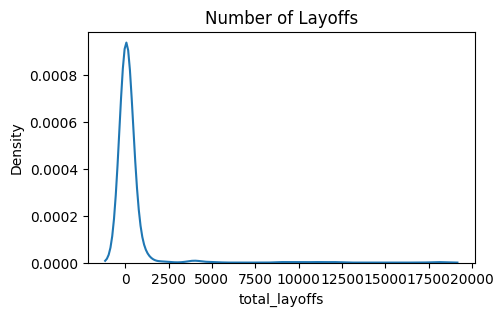

In [66]:
data['total_layoffs'] = data['total_layoffs'].apply(lambda x: 0 if (not isinstance(x, (int,float)) or not str(x).isnumeric()) else int(x))

plt.figure(figsize=(5,3))
sns.kdeplot(x=data['total_layoffs'])
plt.title('Number of Layoffs')
plt.show()

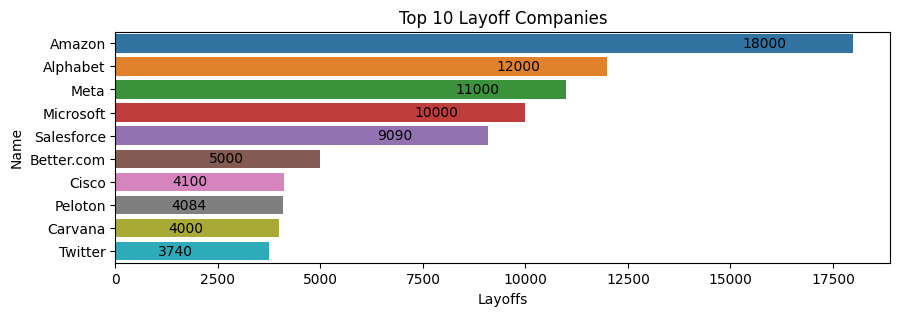

In [69]:
top_10 = data.sort_values('total_layoffs',ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 3))
p=sns.barplot(x="total_layoffs", y="company", data=top_10,
              ax=ax)
for container in p.containers:
    p.bar_label(container,padding=-80)
plt.title("Top 10 Layoff Companies")
plt.xlabel('Layoffs')
plt.ylabel('Name')
plt.show()

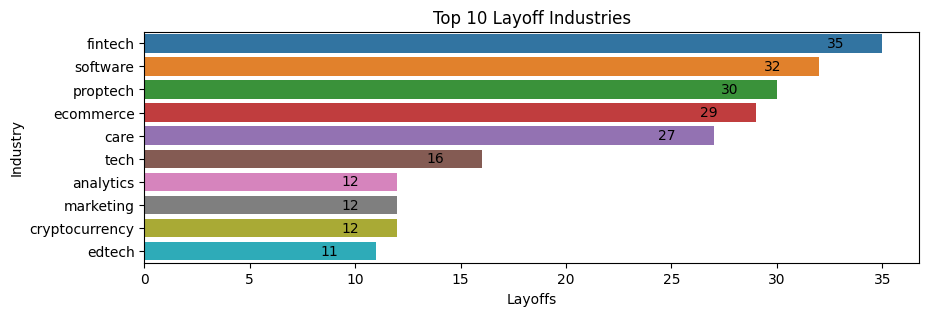

In [70]:
fig, ax = plt.subplots(figsize=(10, 3))
top_10_industries = data['industry'].value_counts().head(10)
top_10_industries = data.groupby('industry').size().sort_values(ascending=False).head(10)
top_10_industries = top_10_industries.to_frame().reset_index()
p=sns.barplot(y='industry',x=0, data=top_10_industries,ax=ax)
for container in p.containers:
    p.bar_label(container,padding=-40)
plt.title("Top 10 Layoff Industries")
plt.xlabel('Layoffs')
plt.ylabel('Industry')
plt.show()

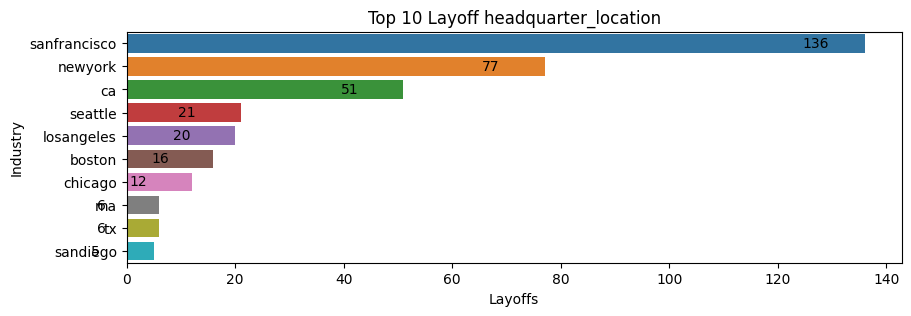

In [71]:
fig, ax = plt.subplots(figsize=(10, 3))
top_10_industries = data['headquarter_location'].value_counts().head(10)
top_10_industries = data.groupby('headquarter_location').size().sort_values(ascending=False).head(10)
top_10_industries = top_10_industries.to_frame().reset_index()
p=sns.barplot(y='headquarter_location',x=0, data=top_10_industries,ax=ax)
for container in p.containers:
    p.bar_label(container,padding=-45)
plt.title("Top 10 Layoff headquarter_location")
plt.xlabel('Layoffs')
plt.ylabel('Industry')
plt.show()

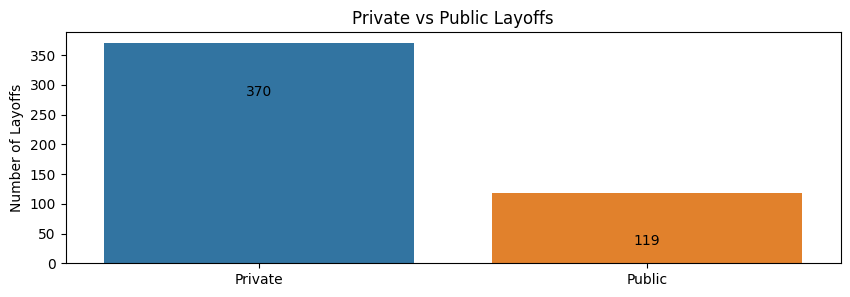

In [72]:
fig, ax = plt.subplots(figsize=(10, 3))
p=sns.countplot(x="status",  data=data,
              ax=ax)
for container in p.containers:
    p.bar_label(container, padding=-40)
plt.title("Private vs Public Layoffs")
plt.xlabel('')
plt.ylabel('Number of Layoffs')
plt.show()

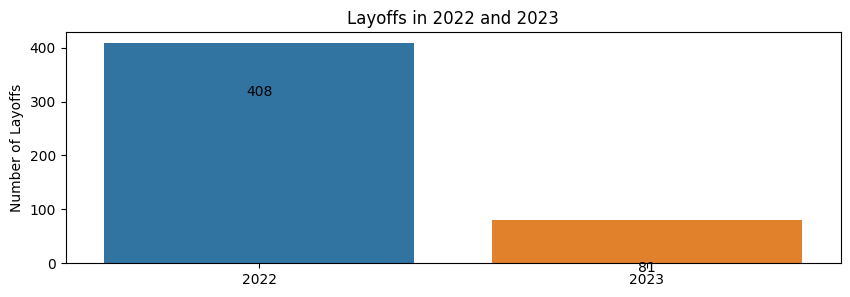

In [74]:
fig, ax = plt.subplots(figsize=(10, 3))
p=sns.countplot(x="year",  data=data,
              ax=ax)
for container in p.containers:
    p.bar_label(container, padding=-40)
plt.title("Layoffs in 2022 and 2023")
plt.xlabel('')
plt.ylabel('Number of Layoffs')
plt.show()